In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
# Part 1.1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables. 

df_normal = pd.read_csv('Normal.csv')
df_type_H = pd.read_csv('Type_H.csv')
df_type_S = pd.read_csv('Type_S.csv')

In [6]:
# Part 1.1 b - Print Shape and columns of all the 3 DataFrames

print("Shape : ",df_normal.shape, '\n')
print(df_normal.head(), '\n')
print(df_normal.info(), '\n', '\n')

print("Shape : ",df_type_H.shape, '\n')
print(df_type_H.head(), '\n')
print(df_type_H.info(), '\n', '\n')

print("Shape : ",df_type_S.shape, '\n')
print(df_type_S.head(), '\n')
print(df_type_S.info())

Shape :  (100, 7) 

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)

In [7]:
# Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

print(df_normal.columns,'\n')
print(df_type_H.columns,'\n')
print(df_type_S.columns,'\n')

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 



***Observations:***

All three DataFrames (df_normal, df_type_H, df_type_S) have the same column names: P_incidence, P_tilt, L_angle, S_slope, P_radius, S_Degree, and Class.

***Implications:***

The consistency in column names across all three DataFrames indicates that they likely represent similar types of data or measurements related to spinal health.

***Further Analysis:***

- Since the column names are identical, differences in the shape (number of rows) of each DataFrame suggest variations in the amount or source of data collected (e.g., different subsets of a larger dataset, different patient groups, or different study conditions).
- The Class column suggests these datasets might involve classification tasks where the 'Class' represents a categorical label (e.g., 'Normal', 'Type H', 'Type S'). The balance of these classes and their distributions across datasets could be further explored for insights into the underlying dataset's characteristics.

In summary, the consistent column names across all three DataFrames indicate a common structure in the data being analyzed, while differences in shape hint at varying sample sizes or datasets with potentially different focuses or populations.

In [8]:
# Part 1.1 d Print DataTypes of all the 3 DataFrames.

print(df_normal.dtypes,'\n')
print(df_type_H.dtypes,'\n')
print(df_type_S.dtypes,'\n')


P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 



***Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames***

DataFrame df_normal:
The 'Class' feature in this DataFrame contains the value 'Normal' for all entries (100 entries).
This suggests that this particular dataset (df_normal) exclusively represents cases categorized as 'Normal' spinal conditions.

DataFrame df_type_H:
The 'Class' feature in this DataFrame contains the value 'Type_H' for all entries (60 entries).
Therefore, this dataset (df_type_H) exclusively represents cases categorized as 'Type_H' spinal conditions.

DataFrame df_type_S:
The 'Class' feature in this DataFrame contains the value 'Type_S' for all entries (150 entries).
Hence, this dataset (df_type_S) exclusively represents cases categorized as 'Type_S' spinal conditions.

In summary, each of the three DataFrames (df_normal, df_type_H, and df_type_S) represents a subset of spinal condition cases categorized into distinct classes ('Normal', 'Type_H', and 'Type_S', respectively). The variation in the 'Class' feature across these DataFrames highlights the different types or categories of spinal conditions captured within each dataset.

In [9]:
# Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

# Convert 'Class' column values to lowercase for all DataFrames
df_normal['Class'] = df_normal['Class'].str.lower()
df_type_H['Class'] = df_type_H['Class'].str.lower()
df_type_S['Class'] = df_type_S['Class'].str.lower()

# Verify the unique values after transformation
unique_classes = set(df_normal['Class']).union(set(df_type_H['Class'])).union(set(df_type_S['Class']))
print("Unified Classes:", unique_classes)

Unified Classes: {'normal', 'type_h', 'tp_s', 'type_s', 'nrmal'}


In [10]:
# Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame
combined_df = pd.concat([df_normal, df_type_H, df_type_S], ignore_index=True)
print("Shape of Combined DataFrame:", combined_df.shape, '\n')
print(combined_df.head(),'\n')
print(combined_df.info())

Shape of Combined DataFrame: (310, 7) 

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  normal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: 

In [11]:
# Part 1.2 c - Print 5 random samples of this DataFrame
random_sample = combined_df.sample(n=5, random_state=42)
print("Random Sample from Combined DataFrame:")
print(random_sample)

Random Sample from Combined DataFrame:
     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
289    82.406524  29.276422  77.054565  53.130102  117.042244  62.765348   
9      64.311867  26.328369  50.958964  37.983498  106.177751   3.118221   
57     52.862214   9.410372  46.988052  43.451842  123.091240   1.856659   
60     51.311771   8.875541  57.000000  42.436230  126.472258  -2.144044   
25     63.929470  19.971097  40.177050  43.958373  113.065939 -11.058179   

      Class  
289    tp_s  
9     nrmal  
57   normal  
60   normal  
25    nrmal  


In [12]:
# Part 1.2 d - Print Feature-wise percentage of Null values 

null_percentage = combined_df.isnull().mean() * 100
# Print the feature-wise percentage of null values
print("Feature-wise Percentage of Null Values:")
print(null_percentage)

Feature-wise Percentage of Null Values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [13]:
# Part 1.2 e - Check 5-point summary of the new dataframe
combined_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


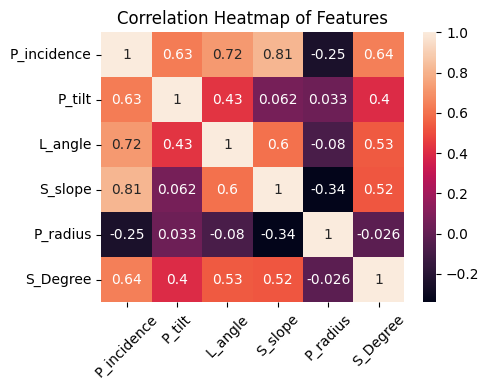

In [14]:
# Part 1.3 a - Visualize a heatmap to understand correlation between all features


plt.figure(figsize=(5, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=combined_df[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']].corr(), annot=True, cbar=True)

# Customize the plot
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

***Part 1.3 b - Share insights on correlation***
- There is a highest correlation between P_Incidence and S_slope
- The lowest correlation value is -0.34 between P_radius and S_Slope

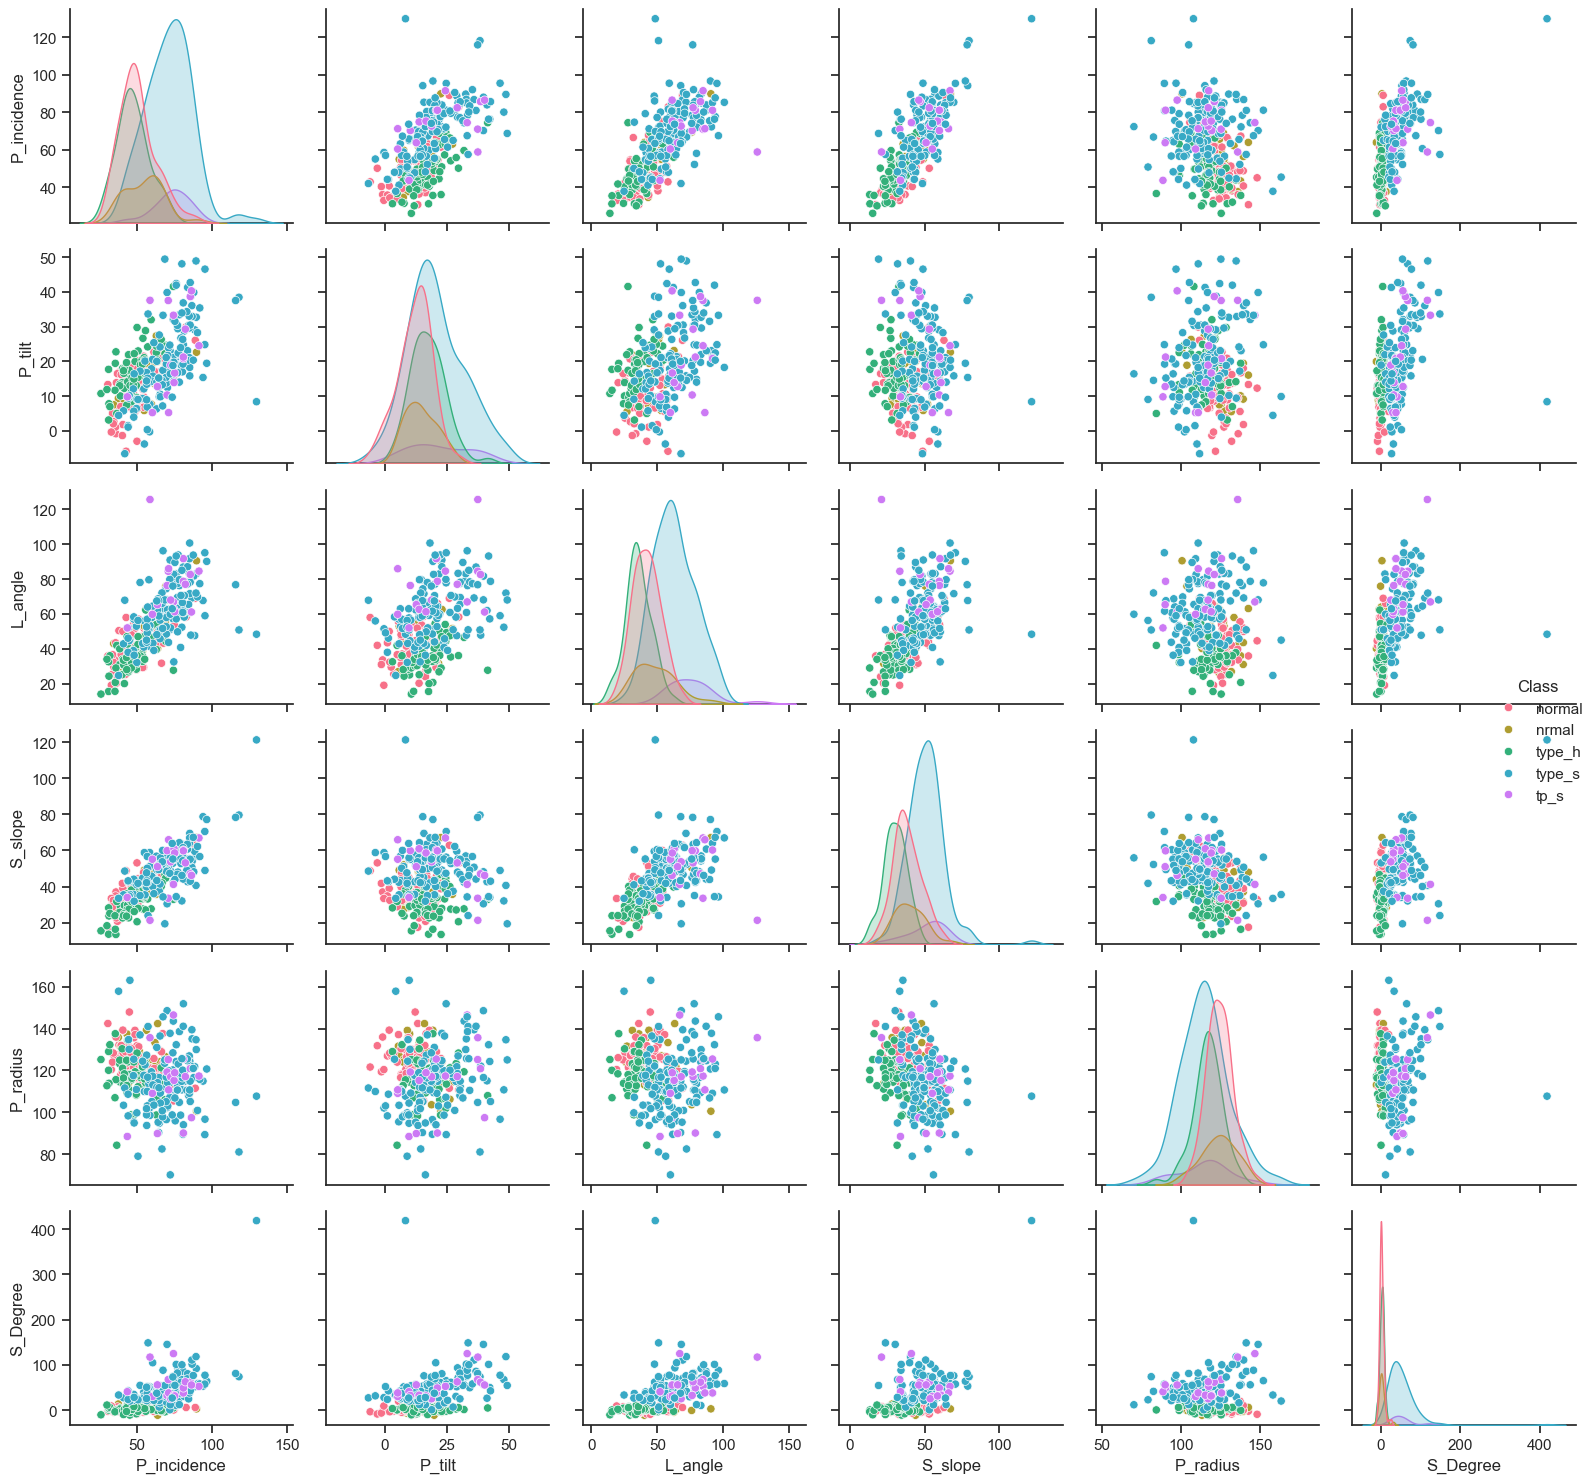

In [15]:
# Part 1.3 c - Visualize a pairplot with 3 classes distinguished by colors and share insights

sns.set(style="ticks", color_codes=True)

# Create pairplot with hue based on 'Class'
sns.pairplot(combined_df, hue="Class", palette="husl")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- There seems to high correlation between L_angle and P_incidence
- There seems to be high correlation between Slope and P_incidence
- There seems to be high correlation between Slope and L_angle

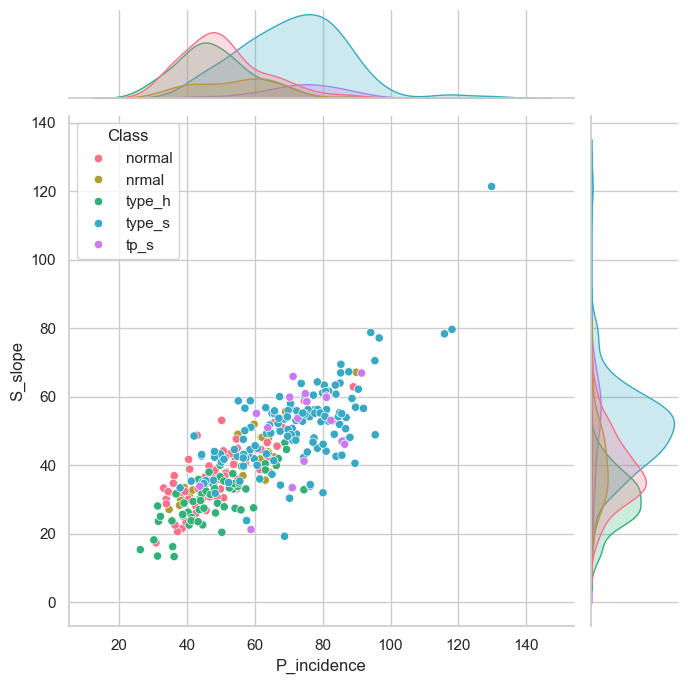

In [16]:
# Part 1.3 d - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights
sns.set(style="whitegrid")

# Create a jointplot
sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter', hue='Class', palette='husl', height=7)

# Display the plot
plt.show()

- There is positive correlation between P_incidence and S_slope for every class

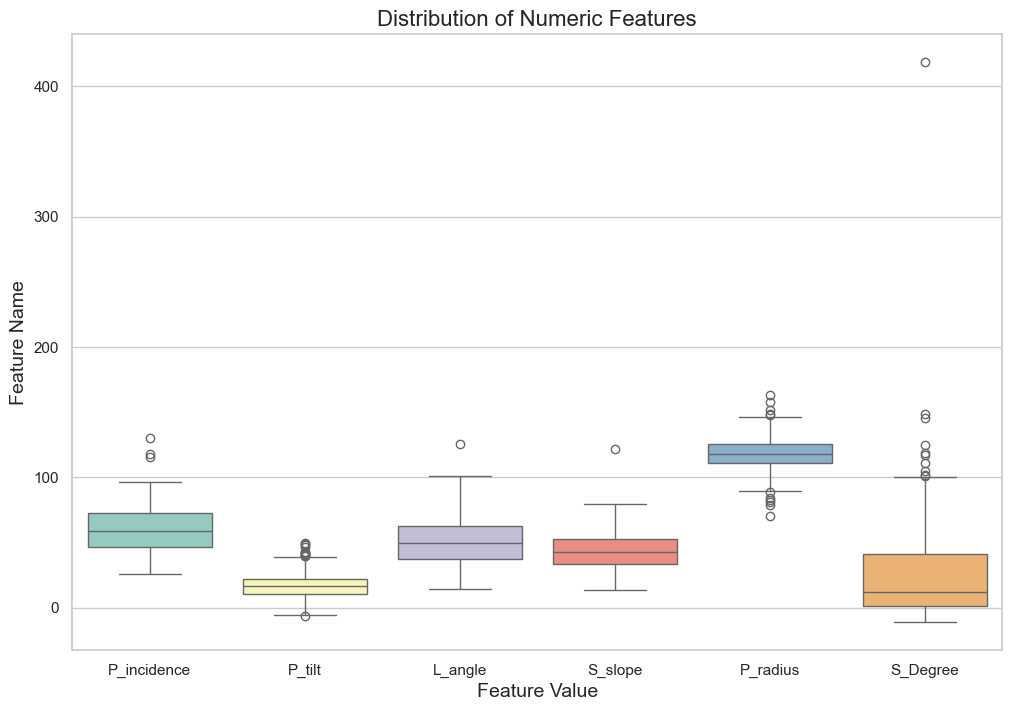

In [17]:
# Part 1.3 e - Visualize a boxplot to check distribution of the features and share insights.

# Set the style
sns.set(style="whitegrid")

# Define the numeric columns (excluding 'Class')
numeric_columns = combined_df.select_dtypes(include='number').columns.tolist()

# Create a boxplot for each numeric feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df[numeric_columns], orient="v", palette="Set3")
plt.title('Distribution of Numeric Features', fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)
plt.show()

In [18]:
# Part 1.4 a - Split data into X and Y.

# Split data into X (features) and Y (target)
X = combined_df.drop('Class', axis=1)
y = combined_df['Class']

In [19]:
# Part 1.4 b - Split data into train and test with 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Part 1.4 c - Train a Supervised Learning Classification base model using KNN classifier 

# Initialize and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example: Using 5 neighbors
knn.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [43]:
def print_metrics(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Performance metrics for {label} data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [44]:
# Part 1.4 d - Print all the possible performance metrics for both train and test data

# Print metrics for train data
print_metrics(y_train, y_train_pred, label="Train")

# Print metrics for test data
print_metrics(y_test, y_test_pred, label="Test")

Performance metrics for Train data:
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.79
Classification Report:
              precision    recall  f1-score   support

      normal       0.68      0.82      0.74        56
       nrmal       0.57      0.36      0.44        22
        tp_s       1.00      0.27      0.43        11
      type_h       0.74      0.70      0.72        50
      type_s       0.92      0.98      0.95       109

    accuracy                           0.80       248
   macro avg       0.78      0.63      0.66       248
weighted avg       0.80      0.80      0.79       248

Performance metrics for Test data:
Accuracy: 0.66
Precision: 0.57
Recall: 0.66
F1 Score: 0.61
Classification Report:
              precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
        tp_s       0.00      0.00      0.00         6
      type_h       0.62      0.80      0.70        10
     

In [51]:
# Part 1.5 a - Experiment with various parameters to improve performance of the base model

# 1. Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the base model
rf = RandomForestClassifier()

# Set up parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Print metrics for train data
print_metrics(y_train, y_train_pred, label="Train")

# Print metrics for test data
print_metrics(y_test, y_test_pred, label="Test")

Performance metrics for Train data:
Accuracy: 0.87
Precision: 0.84
Recall: 0.87
F1 Score: 0.84
Classification Report:
              precision    recall  f1-score   support

      normal       0.82      0.88      0.84        56
       nrmal       1.00      0.36      0.53        22
        tp_s       0.00      0.00      0.00        11
      type_h       0.85      1.00      0.92        50
      type_s       0.89      0.99      0.94       109

    accuracy                           0.87       248
   macro avg       0.71      0.65      0.65       248
weighted avg       0.84      0.87      0.84       248

Performance metrics for Test data:
Accuracy: 0.71
Precision: 0.60
Recall: 0.71
F1 Score: 0.64
Classification Report:
              precision    recall  f1-score   support

      normal       0.75      0.71      0.73        17
       nrmal       0.00      0.00      0.00         5
        tp_s       0.00      0.00      0.00         6
      type_h       0.62      1.00      0.77        10
     

C:\Users\Prat!k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prat!k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prat!k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classific

AttributeError: 'StandardScaler' object has no attribute 'predict'

In [37]:
# Part 2.1 a - Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

df_data1 = pd.read_csv('Data1.csv')
df_data1.head()


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [39]:
df_data2 = pd.read_csv('Data2.csv')
df_data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [42]:
# Part 2.1 b - Print shape and Column Names and DataTypes of both the Dataframes. 

print("Data 1 shape : ", df_data1.shape)
print("Data 1 Columns : ", df_data1.info(), '\n')


print("Data 2 shape : ", df_data2.shape)
print("Data 2 Columns : ", df_data2.info())

Data 1 shape :  (5000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
Data 1 Columns :  None 

Data 2 shape :  (5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mort

In [25]:
# Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

# Merge on 'ID' feature
merged_df = pd.merge(df_data1, df_data2, on='ID', how='inner')

# Display merged DataFrame information
print("Merged DataFrame shape : ", merged_df.shape)
print("Merged DataFrame Columns : ", merged_df.columns)
merged_df.head()

Merged DataFrame shape :  (5000, 14)
Merged DataFrame Columns :  Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [31]:
# Part 2.1 d - Change Datatype of below features to ‘Object’

columns_to_convert = ['Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype('object')

print("\nData Types of Merged DataFrame : \n", merged_df.info())
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   object 
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ KB

Data Types of Merged DataFra

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


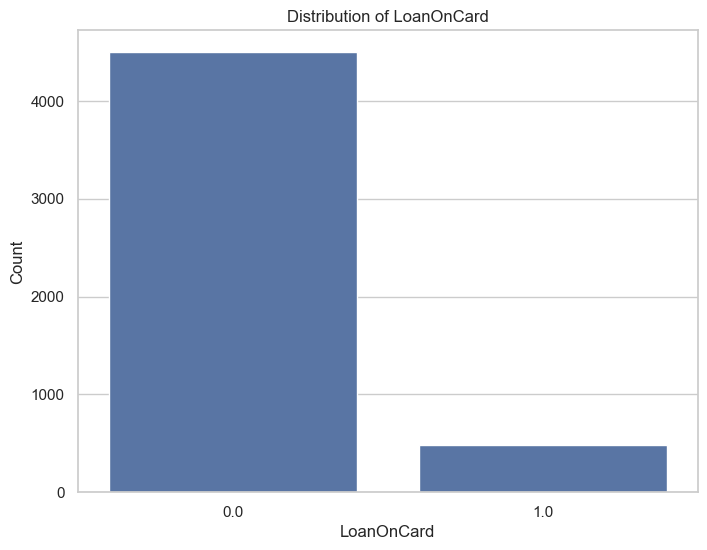

In [34]:
# Part 2.2 a - Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

plt.figure(figsize=(8, 6))
sns.countplot(x='LoanOnCard', data=merged_df)
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

- More than 4500 poeple don't have loan on their cards and less that 500 peole have loan on theit card.
- Data is highly imbalanced.

In [35]:
missing_percentages = merged_df.isnull().mean() * 100

# Display columns with missing values and their respective percentages
print("Percentage of Missing Values:\n", missing_percentages)

# Impute missing values if required
# Let's assume we want to impute missing values in 'LoanOnCard' column with a specific value (e.g., 'No')

# Check if there are any missing values in 'LoanOnCard' column
if merged_df['LoanOnCard'].isnull().sum() > 0:
    # Impute missing values in 'LoanOnCard' column with 'No'
    merged_df['LoanOnCard'].fillna('No', inplace=True)

# Display updated info after imputation
print("\nData Types of Merged DataFrame After Imputation: \n", merged_df.info())

# Display first few rows of the DataFrame
print("\nFirst Few Rows of Merged DataFrame: \n", merged_df.head())


Percentage of Missing Values:
 ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level         

C:\Users\Prat!k\AppData\Local\Temp\ipykernel_30368\1094998202.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['LoanOnCard'].fillna('No', inplace=True)
